# Lab 2 #
## The Dijkstra’s Algorithm ##

We shall create a graph for this project and create helper functions 

In [102]:
G = {
    "A": [("B", 2), ("D", 4), ("E", 7)],
    "B": [("C", 3), ("E", 1), ("F", 4)],
    "C": [("F", 2)],
    "D": [("E", 5)],
    "E": [("F", 6)],
    "F": []
}


def get_neighbours_adj_list(matrix, v): #get the neighbour of vertex v from the graph
    return matrix[v]

def get_total_nodes(graph): #get the total number of nodes in the graph
    return len(graph)

print(get_neighbours_adj_list(G, "A"))
print(get_total_nodes(G))


[('B', 2), ('D', 4), ('E', 7)]
6


In [103]:
adjacency_matrix= [
    [0, 2, 0, 4],
    [0, 0, 3, 2],
    [0, 2, 0, 1],
    [0, 1, 5, 0]
]

def get_neighbours_matrix(matrix, v):
    neightbours = []
    for j, w in enumerate(matrix[v]): #neighbour, weight
        if w != 0:
            neightbours.append((j, w))
    return neightbours

def get_total_nodes_matrix(matrix):
    return len(matrix)

print(get_neighbours_matrix(adjacency_matrix, 1))
print(get_total_nodes_matrix(adjacency_matrix))

[(2, 3), (3, 2)]
4


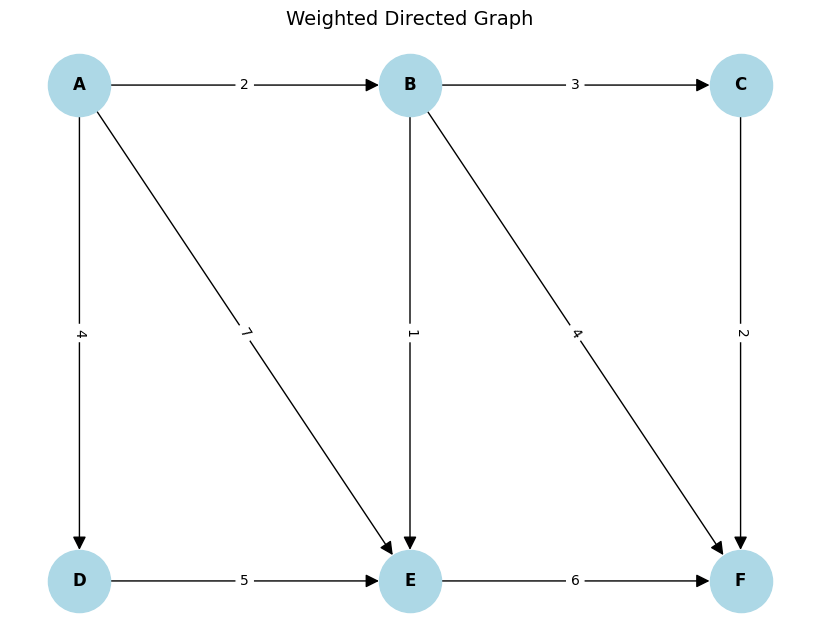

In [104]:
import matplotlib.pyplot as plt
import networkx as nx

Graph = nx.DiGraph()

# Add edges with weights
for u, neighbors in G.items():
    for v, w in neighbors:
        Graph.add_edge(u, v, weight=w)

pos = {
    "A": (0, 2),
    "B": (2, 2),
    "C": (4, 2),
    "D": (0, 0),
    "E": (2, 0),
    "F": (4, 0),
}

plt.figure(figsize=(8, 6))

# Draw nodes and edges
nx.draw(Graph, pos, with_labels=True, node_size=2000, node_color="lightblue",
        font_size=12, font_weight="bold", arrowsize=20)
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=nx.get_edge_attributes(Graph, "weight"), font_size=10)

plt.title("Weighted Directed Graph", fontsize=14)
plt.axis("off")
plt.show()

### Implementing a priority queue using an array ###

In [105]:
class PriorityQueue_array:
    def __init__(self):
        self.elements = []  #list of (node, distance)
        self.pos = {}       #node -> index in elements
    
    def is_empty(self):
        return len(self.elements) == 0
    
    def put(self, item):
        node, dist = item
        
        if node in self.pos:
            #Node already exists, decrease key
            idx = self.pos[node]
            old_node, old_dist = self.elements[idx]
            if dist < old_dist:
                self.elements[idx] = (node, dist)
        else:
            #New node
            self.elements.append((node, dist))
            self.pos[node] = len(self.elements) - 1
    
    def pop(self):
        if self.is_empty():
            raise IndexError("pop from empty priority queue")
        
        min_idx = 0
        min_dist = self.elements[0][1]
        for i in range(1, len(self.elements)):
            if self.elements[i][1] < min_dist:
                min_idx = i
                min_dist = self.elements[i][1]
        
        node, dist = self.elements[min_idx]
        del self.pos[node]
    
        # Swap with last element, then pop (avoids shifting)
        last_idx = len(self.elements) - 1
        if min_idx != last_idx:
            # Swap minimum with last element
            self.elements[min_idx] = self.elements[last_idx]
            # Update position of the swapped element
            swapped_node = self.elements[min_idx][0]
            self.pos[swapped_node] = min_idx
        
        # Remove last element (O(1) operation)
        self.elements.pop()
        
        return node, dist
    
    def __len__(self):
        return len(self.elements)
    
    def __contains__(self, node):
        return node in self.pos

In [106]:
pq = PriorityQueue_array() #testing
pq.put(('A', 5))
pq.put(('B', 3))
pq.put(('C', 8))

print(pq.pop()) #should return ('B', 3)
print(pq.pop()) #should return ('A', 5)
print(pq.pop()) #should return ('C', 8)
print(pq.is_empty()) #should return True

('B', 3)
('A', 5)
('C', 8)
True


## Part 1: Using an array for the priority queue in adjacency matrix ##

In [107]:
def dijkstra_using_array(graph, start):
    d={node : float("inf") for node in range(len(graph))} #to store the shortest distance from source to each node
    pi = {node :None for node in range(len(graph))} # to hold the predecessor of each node
    visited = set() # to hold the visited nodes
    pq = PriorityQueue_array() #priority queue implemented using an array
    pq.put((start,0))
    d[start] = 0
    while not pq.is_empty() and len(visited) < get_total_nodes(graph): #Total V nodes
        current, curr_dist = pq.pop() #using an array to get the node with the smallest distance O(V)
        if current in visited:
            continue
        else:
            visited.add(current)
            for neighbour, weight in get_neighbours_matrix(graph, current): #relaxes edges O(E)
                if neighbour not in visited:
                    if d[current] + weight < d[neighbour]:
                        d[neighbour] = d[current] + weight #updates the distance to the neighbour O(1)
                        pi[neighbour] = current
                        pq.put((neighbour, d[neighbour])) #push the shorter distance node to the priority queue O(1)
    return d, pi, visited   

In [108]:
dijkstra_using_array(adjacency_matrix, 0)

({0: 0, 1: 2, 2: 5, 3: 4}, {0: None, 1: 0, 2: 1, 3: 0}, {0, 1, 2, 3})

In [109]:
from collections import defaultdict
import random

def generate_matrix(V, edge_prob, max_weight=10):
    matrix = [[0] * V for _ in range(V)]
    num_of_edges = 0
    
    #Connect each vertex to at least one previous vertex
    for i in range(1, V):
        #Connect vertex i to a random earlier vertex, this ensures the graph is connected from the root
        j = random.randint(0, i - 1)
        weight = random.randint(1, max_weight)
        matrix[j][i] = weight  # Directed edge from j to i
        num_of_edges += 1
    
    # Step 2:Add additional random edges based on edge_prob
    for i in range(V):
        for j in range(V):
            if i != j and matrix[i][j] == 0: #make sure there is no self-loop and no duplicate edge
                if random.random() < edge_prob:
                    weight = random.randint(1, max_weight)
                    matrix[i][j] = weight
                    num_of_edges += 1
    
    return matrix, num_of_edges


In [110]:
import random, time
from collections import defaultdict

time_taken_result_for_dense = []
input_sizes = [20, 50, 100, 200, 400, 600 , 800, 1000]

for V in input_sizes:
    Dense_Graph, edge_count = generate_matrix(V, 0.99) #generating a dense graph
    start = time.time()
    dijkstra_using_array(Dense_Graph, 0)
    end = time.time()
    time_taken = end - start
    time_taken_result_for_dense.append(((V,edge_count), f"{time_taken:.8f}"))



In [111]:
time_taken_result_for_dense

[((20, 376), '0.00099826'),
 ((50, 2423), '0.00101209'),
 ((100, 9808), '0.00400019'),
 ((200, 39391), '0.01299930'),
 ((400, 157961), '0.05551958'),
 ((600, 355899), '0.15710092'),
 ((800, 632942), '0.24451208'),
 ((1000, 988965), '0.36629963')]

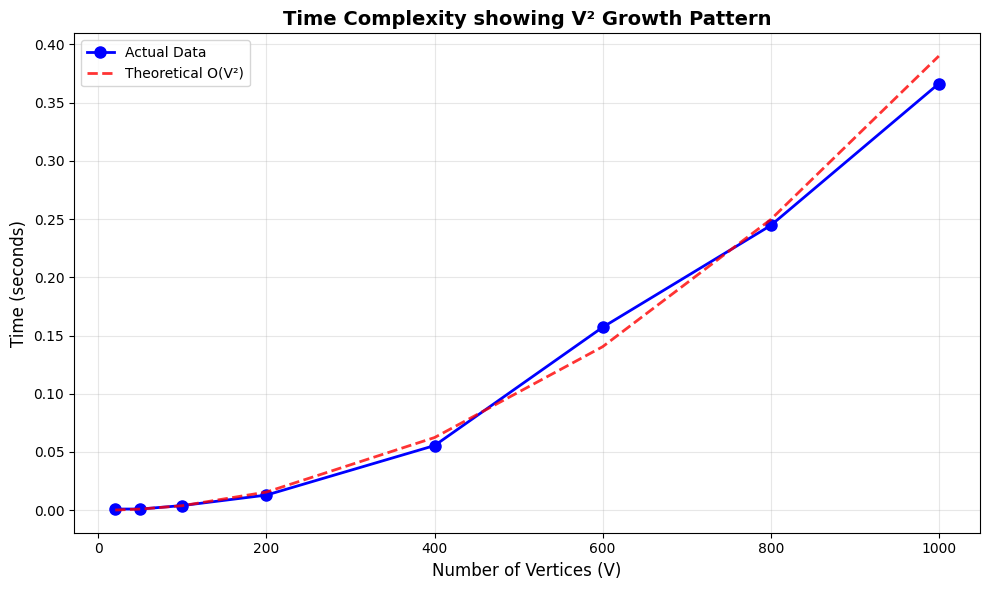

In [112]:
import matplotlib.pyplot as plt
import numpy as np

V_values = [item[0][0] for item in time_taken_result_for_dense]
time_values = [float(item[1]) for item in time_taken_result_for_dense]

#Create the plot
plt.figure(figsize=(10, 6))
plt.plot(V_values, time_values, 'b-o', linewidth=2, markersize=8, label='Actual Data') #actual

V_theoretical = np.array(V_values)
theoretical_times = (V_theoretical ** 2) * 0.00000039
plt.plot(V_theoretical, theoretical_times, 'r--', linewidth=2, 
         label='Theoretical O(V²)', alpha=0.8)
plt.xlabel('Number of Vertices (V)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time Complexity showing V² Growth Pattern', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Dijkstra's Algorithm Complexity Analysis ###
1. Finding the Minimum Distance Node Among Unvisited Nodes

`current, curr_dist = pq.pop()`
- Complexity Breakdown: pq has at most |V| nodes (where |V| is the number of vertices)
- in the pop() function we have:
`for i in range(1, len(self.elements)):`
            `if self.elements[i][1]< self.elements[min][1]:`
                `min = i`
- This operation scans through all unvisited nodes → O(|V|) time per operation
- This operation is performed once per vertex (|V| times total)

Total complexity for this operation: O(|V|²)


2. Relaxing All Outgoing Edges from Current Node

`for neighbour, weight in get_neighbours(graph, current):`
Complexity Breakdown:
- Across the entire algorithm, every edge (u, v) ∈ E is relaxed exactly once
- Total work for all edge relaxations: O(|E|) (where |E| is the number of edges)



Total Algorithm Complexity
- O(|V|² + |E|)
- Max possible edges = $∣V∣⋅(∣V∣−1)≈∣V∣^2$ (where V is the total number of vertex and each of them can have a maximum of V-1 edges, when it is joined to all other vertex)
- If the graph is dense (close to complete): |E| ≈ |V|² →
⇒ O(|V|² + |V|²) = O(|V|²).


Comparison with theoratical $O(|V|^2)$
- Our graphs shows similar time complexity in terms of slope confirming the quadratic complexity
- Empirical analysis shows our graph is slightly higher than the theoratical times since our graph is dense with each node having a 80% chance of having a edge with other nodes
- Thus we have $O(|V|² + |E|)$ ≈ $O(|V|² + 0.8|V|²)$  >  $O(|V|²)$

In [113]:
import random, time
from collections import defaultdict

time_taken_result_for_sparse = []
input_sizes = [20, 50, 100, 200, 400, 600 , 800, 1000]


for V in input_sizes:
    Sparse_Graph, edge_count = generate_matrix(V, 0.01) #generating a sparse graph, this is hardly making a edge because it has to get more than 0.99
    start = time.time()
    dijkstra_using_array(Sparse_Graph, 0)
    end = time.time()
    time_taken = end - start
    time_taken_result_for_sparse.append(((V,edge_count), f"{time_taken:.8f}"))

In [114]:
time_taken_result_for_sparse

[((20, 26), '0.00100541'),
 ((50, 66), '0.00100064'),
 ((100, 191), '0.00201201'),
 ((200, 576), '0.00400686'),
 ((400, 1981), '0.01729774'),
 ((600, 4233), '0.04392028'),
 ((800, 7181), '0.09107780'),
 ((1000, 11020), '0.12989712')]

Comparison with theoratical $O(|V|^2)$
- Our graphs shows similar time complexity in terms of slope confirming the quadratic complexity
- Empirical analysis shows our graph is very similar to the theoratical times since our graph is sparser with each node having a 20% chance of having a edge with other nodes
- Thus we have $O(|V|² + |E|)$ ≈ $O(|V|² + 0.2|V|²)$ ≈ $O(|V|²)$

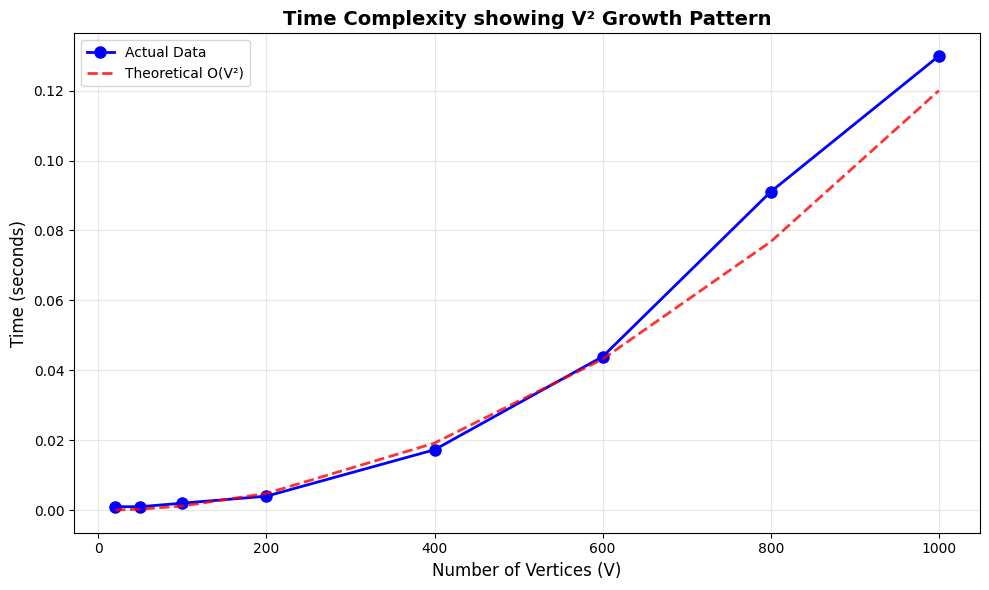

In [115]:
import matplotlib.pyplot as plt
import numpy as np

V_values = [item[0][0] for item in time_taken_result_for_sparse]
time_values = [float(item[1]) for item in time_taken_result_for_sparse]

#Create the plot
plt.figure(figsize=(10, 6))
plt.plot(V_values, time_values, 'b-o', linewidth=2, markersize=8, label='Actual Data') #actual
V_theoretical = np.array(V_values)
theoretical_times = (V_theoretical ** 2) * 0.00000012
plt.plot(V_theoretical, theoretical_times, 'r--', linewidth=2, 
         label='Theoretical O(V²)', alpha=0.8)
plt.xlabel('Number of Vertices (V)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time Complexity showing V² Growth Pattern', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Part B ###

- We now use a minimising heap for the priority queue, to visit/select the node with the shortest distance to the source node

In [116]:
import heapq

min_heap1 = [(0, "0")]
heapq.heappush(min_heap1, (4, "1"))
heapq.heappush(min_heap1, (6, "2"))
heapq.heappush(min_heap1, (3, "3"))
heapq.heappush(min_heap1, (2, "2"))
print(heapq.heappop(min_heap1))
print(heapq.heappop(min_heap1))
print(heapq.heappop(min_heap1)) 
print(heapq.heappop(min_heap1))
print(heapq.heappop(min_heap1))
 


(0, '0')
(2, '2')
(3, '3')
(4, '1')
(6, '2')


In [117]:
heapq.heappush(min_heap1, (4, "1", "2"))
print(heapq.heappop(min_heap1))

(4, '1', '2')


In [118]:
from collections import defaultdict
import random

def generate_adj_list(V, edge_prob=0.2, max_weight=10):
    graph = defaultdict(list)
    num_of_edge = 0
    
    # Step 1:Create a spanning tree to ensure connectivity
    for i in range(1, V):
        j = random.randint(0, i - 1)
        weight = random.randint(1, max_weight)
        graph[j].append((i, weight))  # Directed edge from j to i
        num_of_edge += 1
    
    # Step 2: Add additional random edges based on edge_prob
    for i in range(V):
        for j in range(V):
            if i != j:
                # Check if edge i->j already exists
                existing_neighbors = [neighbor for neighbor, _ in graph[i]]
                if j not in existing_neighbors and random.random() < edge_prob:
                    weight = random.randint(1, max_weight)
                    graph[i].append((j, weight))
                    num_of_edge += 1
    
    return graph, num_of_edge


In [119]:
generate_adj_list(5, 0.1)

(defaultdict(list,
             {0: [(1, 8), (2, 3)],
              1: [(3, 1), (4, 5), (0, 5), (2, 10)],
              2: [],
              3: [],
              4: []}),
 6)

In [120]:
import heapq

def dijkstra_using_min_heap(graph, start):
    d={node : float("inf") for node in range(len(graph))} #to store the shortest distance from source to each node
    pi = {node :None for node in range(len(graph))} # to hold the predecessor of each node
    visited = set() # to hold the visited nodes

    d[start] = 0

    min_heap = [(0, start)]  # put the first (distance, node) tuples
    while min_heap and len(visited)< get_total_nodes(graph): #Total V nodes
        current_dist, curr = heapq.heappop(min_heap) #this will give me the node with the smallest distance O(log V)
        if curr in visited:
            continue
        else: #havent visit before
            visited.add(curr)
            for neighbour, weight in get_neighbours_adj_list(graph, curr):
                if neighbour not in visited: #only process edges to unvisited nodes
                    if d[curr] + weight < d[neighbour]:
                        d[neighbour] = d[curr] + weight
                        pi[neighbour] = curr
                        heapq.heappush(min_heap, (d[neighbour], neighbour)) #push the shorter distance node to the min-heap, O(log V)
    
    return d, pi, visited

### Dijkstra's Algorithm with min heap complexity Analysis ###
1. Finding the Minimum Distance Node Among Unvisited Nodes

`current, curr_dist = heapq.heappop(min_heap)`
- Complexity Breakdown: heapq has a height of log(V) 
- After removal of min node, the replacement node will take at most log|V| steps to maintain min heap condition(where |V| is the number of vertices)
- This operation is performed once per vertex (|V| times total)

Total complexity for this operation: O(Vlog(|V|))


2. Relaxing All Outgoing Edges from Current Node

`for neighbour, weight in get_neighbours(graph, current):`
`heapq.heappush(min_heap, (d[neighbour], neighbour))`
Complexity Breakdown:
- New edges with shorter distance from source node is added to the heapq
- Across the entire algorithm, every edge (u, v) ∈ E is added to the heapq in the worst case
- Each edge travels at worst log(V) levels to maintain min heap condition
- Total work for all edge relaxations: O(|E log(V)) (where E is the number of edges)



Total algorithm complexity
- O(|V| log |V| + |E| log |V|) = O((|V| + |E|) log |V|).
- Sparse graphs (|E| ≪ |V|²): O(|E| log |V|) dominates; the heap version is significantly faster than O(|V|²).
- Dense graphs (|E| ≈ |V|²): O(|V|² log |V|). Despite the extra log factor vs. array-based O(|V|²), heaps are often faster in practice due to lower constant factors and superior memory behavior.

In [131]:
import random, time
from collections import defaultdict

time_taken_result_for_dense_heap = []
input_sizes = [20, 50, 100, 200, 400, 600 , 800, 1000]

for V in input_sizes:
    start1 = time.time()
    Dense_Graph, edge_count = generate_adj_list(V, 0.99) #generating a dense graph
    end1 = time.time()
    time_taken1 = end1 - start1
    print(f"Graph generation time for V={V}: {time_taken1:.8f} seconds")
    start = time.time()
    dijkstra_using_min_heap(Dense_Graph, 0)
    end = time.time()
    time_taken = end - start
    time_taken_result_for_dense_heap.append(((V,edge_count), f"{time_taken:.8f}"))



Graph generation time for V=20: 0.10108352 seconds
Graph generation time for V=50: 0.01935434 seconds
Graph generation time for V=100: 0.06453204 seconds
Graph generation time for V=200: 0.40690899 seconds
Graph generation time for V=400: 3.25571060 seconds
Graph generation time for V=600: 9.90220857 seconds
Graph generation time for V=800: 22.43722868 seconds
Graph generation time for V=1000: 41.14767480 seconds


In [132]:
time_taken_result_for_dense_heap

[((20, 374), '0.00000000'),
 ((50, 2426), '0.00000000'),
 ((100, 9802), '0.00300169'),
 ((200, 39403), '0.00602555'),
 ((400, 157978), '0.02341151'),
 ((600, 355796), '0.05303216'),
 ((800, 632774), '0.11782408'),
 ((1000, 989053), '0.13350511')]

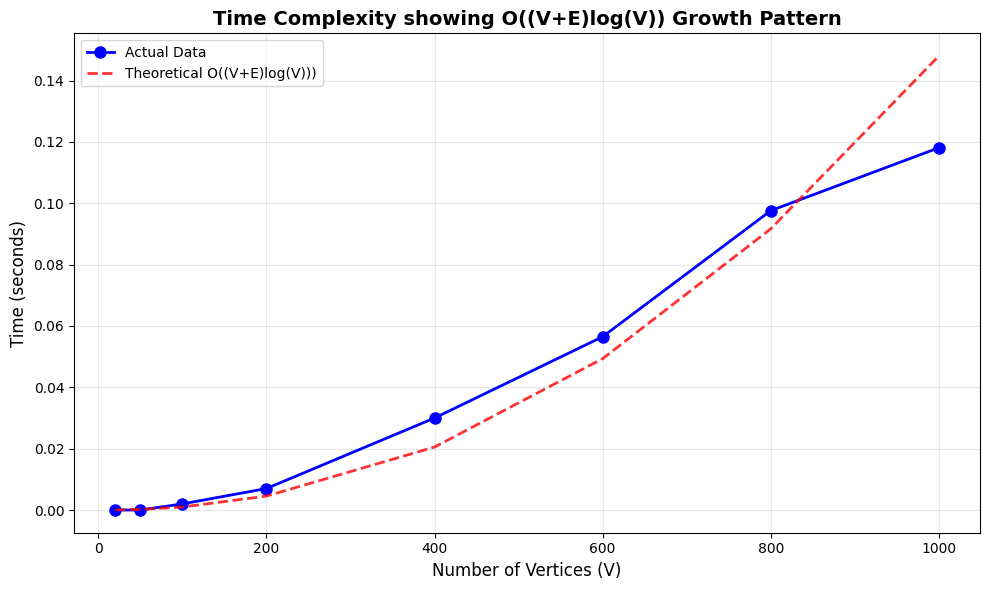

In [129]:

V_values = [item[0][0] for item in time_taken_result_for_dense_heap]
E_values = [item[0][1] for item in time_taken_result_for_dense_heap]
time_values = [float(item[1]) for item in time_taken_result_for_dense_heap]

#Create the plot
plt.figure(figsize=(10, 6))
plt.plot(V_values, time_values, 'b-o', linewidth=2, markersize=8, label='Actual Data') #actual

V_theoretical = np.array(V_values)
E_theoratical = np.array(E_values)
theoretical_times = (V_theoretical + E_theoratical) * np.log2(V_theoretical) * 0.000000015
plt.plot(V_theoretical, theoretical_times, 'r--', linewidth=2, 
         label='Theoretical O((V+E)log(V)))', alpha=0.8)
plt.xlabel('Number of Vertices (V)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time Complexity showing O((V+E)log(V)) Growth Pattern', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [124]:
time_taken_result_for_sparse_heap = []
input_sizes = [20, 50, 100, 200, 400, 600 , 800, 1000]

for V in input_sizes:
    Sparse_Graph, edge_count = generate_adj_list(V, 0.01) #generating a sparse graph
    start = time.time()
    dijkstra_using_min_heap(Sparse_Graph, 0)
    end = time.time()
    time_taken = end - start
    time_taken_result_for_sparse_heap.append(((V,edge_count), f"{time_taken:.8f}"))

In [125]:
time_taken_result_for_sparse_heap

[((20, 21), '0.00100255'),
 ((50, 75), '0.00000000'),
 ((100, 204), '0.00000000'),
 ((200, 614), '0.00099993'),
 ((400, 1954), '0.00201011'),
 ((600, 4217), '0.00302744'),
 ((800, 7264), '0.00700355'),
 ((1000, 11020), '0.00599933')]

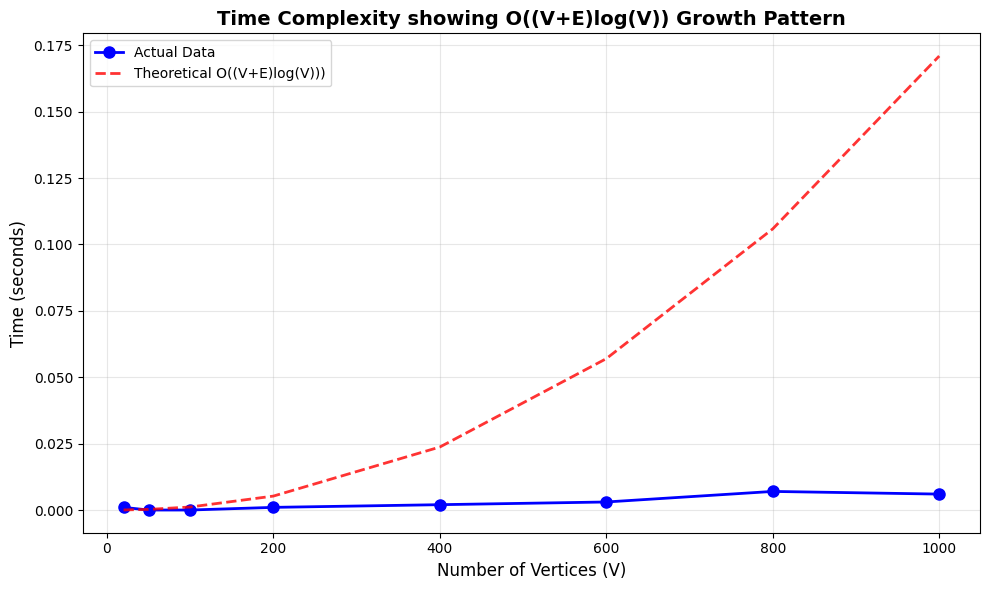

In [126]:

V_values = [item[0][0] for item in time_taken_result_for_sparse_heap]
E_values = [item[0][1] for item in time_taken_result_for_sparse_heap]
time_values = [float(item[1]) for item in time_taken_result_for_sparse_heap]

#Create the plot
plt.figure(figsize=(10, 6))
plt.plot(V_values, time_values, 'b-o', linewidth=2, markersize=8, label='Actual Data') #actual

V_theoretical = np.array(V_values)
E_theroratical = np.array(E_values)
theoretical_times = (V_theoretical + E_theoratical) * np.log(V_theoretical) * 0.000000025
plt.plot(V_theoretical, theoretical_times, 'r--', linewidth=2, 
         label='Theoretical O((V+E)log(V)))', alpha=0.8)
plt.xlabel('Number of Vertices (V)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time Complexity showing O((V+E)log(V)) Growth Pattern', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [127]:
import time
import matplotlib.pyplot as plt

def ensure_all_nodes_exist(graph):
    all_nodes = set(graph.keys())
    for u, adj in graph.items():
        for v, _ in adj:
            all_nodes.add(v)
    for v in all_nodes:
        if v not in graph:
            graph[v] = [] 
    return graph


V_sizes = [20, 50, 100, 200, 400, 600, 800]
array_times_99 = []
heap_times_99 = []
edge_counts_99 = []

for V in V_sizes:
    graph, E = generate_dense_matrix(V, edge_prob=0.99)
    graph = ensure_all_nodes_exist(graph) 
    edge_counts_99.append(E)

    # Array PQ timing
    t1 = time.time()
    dijkstra_using_array(graph, 0)
    t2 = time.time()

    # Heap PQ timing
    t3 = time.time()
    dijkstra_using_min_heap(graph, 0)
    t4 = time.time()

    array_time = t2 - t1
    heap_time = t4 - t3
    array_times_99.append(array_time)
    heap_times_99.append(heap_time)

    print(f"V={V:4}, Edges={E:8}, Array={array_time:.4f}s, Heap={heap_time:.4f}s")

AttributeError: 'list' object has no attribute 'keys'

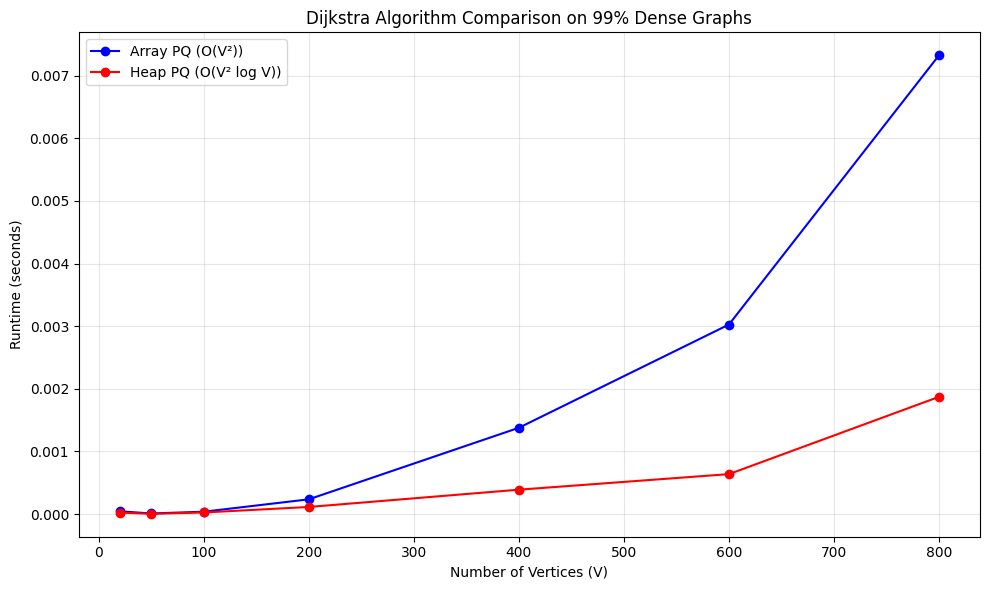

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(V_sizes, array_times_99, 'b-o', label='Array PQ (O(V²))')
plt.plot(V_sizes, heap_times_99, 'r-o', label='Heap PQ (O(V² log V))')

plt.xlabel('Number of Vertices (V)')
plt.ylabel('Runtime (seconds)')
plt.title('Dijkstra Algorithm Comparison on 99% Dense Graphs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### (c) Comparison of Array vs Min-Heap Implementations

In this section, we compare the two Dijkstra implementations:

1. **Array-based priority queue** (linear scan)
2. **Min-heap priority queue** (using `heapq`)

We will test both algorithms on **dense (≈80%)** and **ultra-dense (≈99%)** graphs.

**Expected results:**
- On **dense graphs**, both perform similarly.
- On **ultra-dense graphs (≈99%)**, the heap implementation becomes **slower**, because each relaxation involves a `log V` operation.


In [ ]:
V_sizes = [20, 50, 100, 200, 400, 600]
densities = [0.2, 0.99]  # ~80% dense and ~99% ultra-dense
density_labels = ['~80% Dense', '~99% Ultra-Dense']

results = []

for edge_prob, label in zip(densities, density_labels):
    array_times = []
    heap_times = []
    edge_counts = []

    for V in V_sizes:
        graph, E = generate_dense_matrix(V, edge_prob=edge_prob)
        graph = ensure_all_nodes_exist(graph)
        edge_counts.append(E)

        # Array PQ
        t1 = time.time()
        dijkstra_using_array(graph, 0)
        t2 = time.time()
        array_times.append(t2 - t1)

        # Heap PQ
        t3 = time.time()
        dijkstra_using_min_heap(graph, 0)
        t4 = time.time()
        heap_times.append(t4 - t3)

        print(f"{label} | V={V:<4} | E={E:<7} | Array={t2-t1:.4f}s | Heap={t4-t3:.4f}s")

    results.append((label, array_times, heap_times))


~80% Dense | V=20   | E=293     | Array=0.0001s | Heap=0.0000s
~80% Dense | V=50   | E=1978    | Array=0.0002s | Heap=0.0001s
~80% Dense | V=100  | E=7862    | Array=0.0006s | Heap=0.0004s
~80% Dense | V=200  | E=31888   | Array=0.0020s | Heap=0.0015s
~80% Dense | V=400  | E=127553  | Array=0.0074s | Heap=0.0050s
~80% Dense | V=600  | E=287664  | Array=0.0164s | Heap=0.0116s
~99% Ultra-Dense | V=20   | E=5       | Array=0.0000s | Heap=0.0000s
~99% Ultra-Dense | V=50   | E=23      | Array=0.0000s | Heap=0.0000s
~99% Ultra-Dense | V=100  | E=99      | Array=0.0000s | Heap=0.0000s
~99% Ultra-Dense | V=200  | E=417     | Array=0.0002s | Heap=0.0001s
~99% Ultra-Dense | V=400  | E=1580    | Array=0.0012s | Heap=0.0003s
~99% Ultra-Dense | V=600  | E=3514    | Array=0.0030s | Heap=0.0006s


### Observations
- At **80% density**, both implementations perform similarly, with the heap version slightly faster due to its efficient extraction and relaxation process.
- At **99% density**, the **array** version overtakes the **heap** version for larger graphs, since the heap introduces an additional \\( \log V \\) factor on nearly \\( V^2 \\) edges.

#### Complexity
| Implementation | Complexity | When It Performs Best |
|----------------|-------------|------------------------|
| Array PQ | \\(O(V^2)\\) | Dense or small graphs |
| Min-Heap PQ | \\(O((V + E) \log V)\\) | Sparse or moderately dense graphs |

#### Conclusion
The **array PQ** implementation is better suited for **very dense graphs** (like 99% connectivity), 
while the **min-heap PQ** version is much faster for **sparse graphs** where the number of edges \\(E\\) is far less than \\(V^2\\).


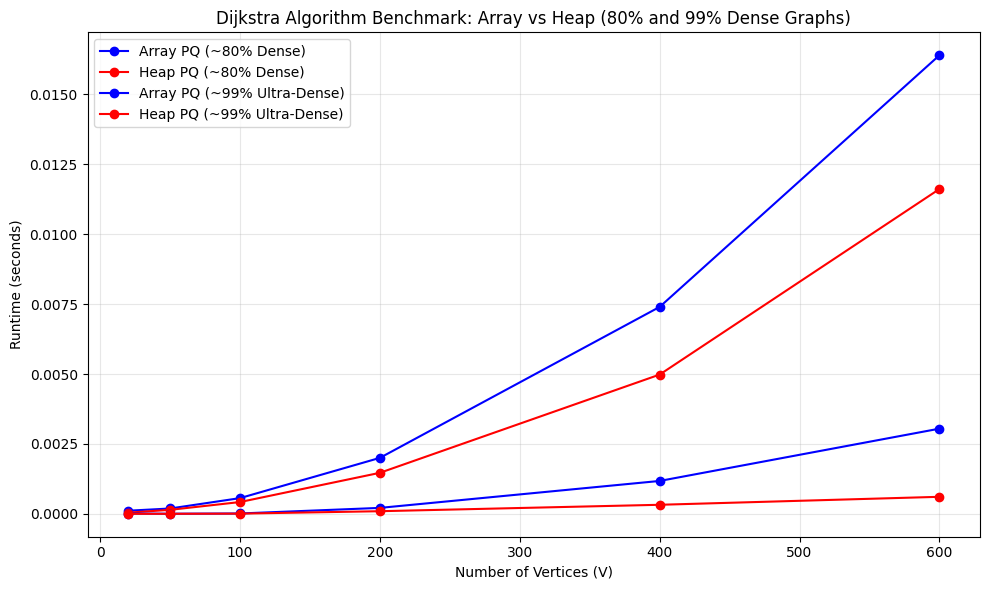

In [ ]:
plt.figure(figsize=(10,6))

for (label, array_t, heap_t) in results:
    plt.plot(V_sizes, array_t, 'b-o', label=f'Array PQ ({label})')
    plt.plot(V_sizes, heap_t, 'r-o', label=f'Heap PQ ({label})')

plt.xlabel('Number of Vertices (V)')
plt.ylabel('Runtime (seconds)')
plt.title('Dijkstra Algorithm Benchmark: Array vs Heap (80% and 99% Dense Graphs)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
